(60000, 28, 28)
(10000, 28, 28)
GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


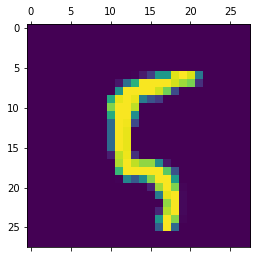

In [8]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# scale the model!!!
X_train = X_train / 255
X_test = X_test / 255

plt.matshow(X_train[100])
print(X_train.shape)
print(X_test.shape)

print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

In [9]:
X_train.shape

(60000, 28, 28)

# ANN Model

In [10]:
# flatten training dataset: from 28 x 28 to 1 x 784 array
X_train_flatten = X_train.reshape(len(X_train), 28 * 28)
X_test_flatten = X_test.reshape(len(X_test), 28 * 28)

# def the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28 * 28, )), # so that we don't need to flatten our data
    keras.layers.Dense(200, activation='relu'), # input layer, try 100 units
    keras.layers.Dense(10, activation='sigmoid') # hidden layer
])


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy']) # 1 hot encoded array (also can use mean_square_error)

# train the model
model.fit(X_train_flatten, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 2s 938us/step - loss: 0.2360 - accuracy: 0.9327
Epoch 2/20
1875/1875 [==============================] - 2s 931us/step - loss: 0.1012 - accuracy: 0.9698
Epoch 3/20
1875/1875 [==============================] - 2s 931us/step - loss: 0.0676 - accuracy: 0.9794
Epoch 4/20
1875/1875 [==============================] - 2s 938us/step - loss: 0.0491 - accuracy: 0.9850
Epoch 5/20
1875/1875 [==============================] - 2s 934us/step - loss: 0.0366 - accuracy: 0.9889
Epoch 6/20
1875/1875 [==============================] - 2s 933us/step - loss: 0.0283 - accuracy: 0.9910
Epoch 7/20
1875/1875 [==============================] - 2s 950us/step - loss: 0.0219 - accuracy: 0.9932
Epoch 8/20
1875/1875 [==============================] - 2s 986us/step - loss: 0.0179 - accuracy: 0.9945
Epoch 9/20
1875/1875 [==============================] - 2s 977us/step - loss: 0.0142 - accuracy: 0.9956
Epoch 10/20
1875/1875 [==============================] - 2s 979u

In [11]:
X_train_flatten.shape

(60000, 784)

In [12]:
# evaluate the model
print(model.evaluate(X_test_flatten, y_test), end="\n\n")

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred] # argmax returns the index of the maximum value in the array

print("Classification Report: \n", classification_report(y_test, y_pred_class))

313/313 [==============================] - 0s 889us/step - loss: 0.1114 - accuracy: 0.9779
[0.1114346832036972, 0.9779000282287598]

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.95      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



9


array([3.2573734e-08, 2.4736510e-06, 2.3141519e-10, 2.6941165e-02,
       4.4431558e-04, 1.0047307e-05, 3.5628737e-14, 5.5162132e-01,
       1.6684945e-04, 9.9994946e-01], dtype=float32)

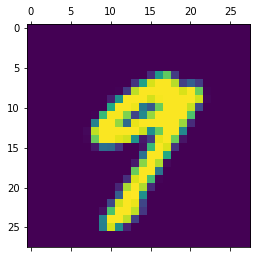

In [13]:
# predict the model
y_predicted = model.predict(X_test_flatten)

plt.matshow(X_test[20])
print(np.argmax(y_predicted[20])) # prediction
y_predicted[20]

Text(69.0, 0.5, 'Actual')

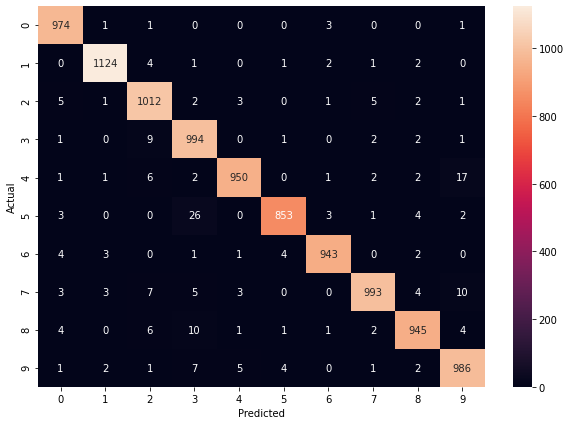

In [14]:
import seaborn as sn

cm = tf.math.confusion_matrix(labels=y_test, predictions=[np.argmax(i) for i in y_predicted])

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")

# CNN Model

In [15]:

X_train_flatten = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# define and train model
cnn = keras.Sequential([
    # cnn layer
    keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)), # filter means amount of features
    keras.layers.MaxPooling2D((2, 2)), # can use average pooling as well

    keras.layers.Conv2D(filters=4, kernel_size=(3, 3), activation="relu"), 
    keras.layers.MaxPooling2D((2, 2)),

    # dense layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# in this case we don't need to one hot encode y using sparse_categorical_crossentropy (single value)


In [16]:
# train the model
cnn.fit(X_train_flatten, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2784 - accuracy: 0.9147
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1127 - accuracy: 0.9657
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0876 - accuracy: 0.9729
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0712 - accuracy: 0.9781
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0615 - accuracy: 0.9813
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0548 - accuracy: 0.9828
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0494 - accuracy: 0.9843
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0441 - accuracy: 0.9859


In [17]:
y_pred = cnn.predict(X_test)
y_pred_class = [np.argmax(x) for x in y_pred] # argmax returns the index of the maximum value in the array

print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.96      1.00      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.96      0.99      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

